### Project 1 - Turbofan Design Parameter Study
#### AEEM404063 Airbreathing Propulsion
#### Matt Boller, Pierce Elliott, Jon Frueh, Ben Rupe
#### Fall Semester 2023 

In [1]:
from Project1BackendCalcs import TFComputation
import numpy as np
import matplotlib.pyplot as plt

### Real Cycle comparison

In [2]:
TF = TFComputation()
#B = 10.0; pi_f = 1.5; pi_c = 36
data, tau, temp, M = TF.fullCycleCalc(isentropic='F')
print('------------- Data Output -------------')
print("mdot = " + str(np.round(data[0],5)) + " (kg/s)")
print("dia = " + str(np.round(data[1],5))+ " (m)")
print("F/mdot = " + str(np.round(data[2],5))+ " (N/(kg/s))")
print("TSFC = " + str(np.round(data[3],5)))
print("f = " + str(np.round(data[4],5)))
print("Thermal efficiency = " + str(np.round(data[5],5)))
print("Propulsive efficiency = " + str(np.round(data[6],5)))
print("Overall efficiency = " + str(np.round(data[7],5)))

print("Tau f = ", np.round(tau[0],5))
print("Tau cH = ", np.round(tau[1],5))
print("Tau tH = ", np.round(tau[2],5))
print("Tau tL = ", np.round(tau[3],5))

print("T_02 = ", np.round(temp[0],5))
print("T_02.5 = ", np.round(temp[1],5))
print("T_03 = ", np.round(temp[2],5))

print("T_04 = ", np.round(temp[3],5))
print("T_04.5 = ", np.round(temp[4],5))
print("T_05 = ", np.round(temp[5],5))
print("P_02 = ", np.round(temp[6],5))
print("P_025 = ", np.round(temp[7],5))
print("P_03 = ", np.round(temp[8],5))
print("P_04 = ", np.round(temp[9],5))
print("P_045 = ", np.round(temp[10],5))
print("P_05 = ", np.round(temp[11],5))

print("M9 = ", np.round(M[0],5))
print("M19 = ", np.round(M[1],5))



------------- Data Output -------------
mdot = 572.18044 (kg/s)
dia = 2.82157 (m)
F/mdot = 122.7095 (N/(kg/s))
TSFC = 16.3922
f = 0.02213
Thermal efficiency = 0.46203
Propulsive efficiency = 0.76868
Overall efficiency = 0.35515
Tau f =  1.13902
Tau cH =  3.11935
Tau tH =  0.66782
Tau tL =  0.68491
T_02 =  248.1276
T_02.5 =  282.62149
T_03 =  881.59569
T_04 =  1560
T_04.5 =  1041.80579
T_05 =  713.54484
P_02 =  36085.94081
P_025 =  54128.91121
P_03 =  1948640.80369
P_04 =  1870695.17154
P_045 =  310555.14947
P_05 =  57686.86952
M9 =  1.24738
M19 =  1.17946


### Bypass Ratio (BPR) Design Study 
Our team has performed a robust analysis on our turbofan BPR and will demonstrate below the effect of bypass ratios ranging from 5 to 20 on the $\frac{F}{\dot{m}}$, TSFC, $f$, $\eta_T$, $\eta_P$, and $\eta_O$

c:\Users\Delli\Documents\GitHub\AirbreathingProject1\Project1BackendCalcs.py:200: RuntimeWarning: invalid value encountered in sqrt
  M9 = np.sqrt((1/(1-nj*(-(pa/self.P_05)**((yh-1)/yh) + 1))-1)*2/(yh-1))


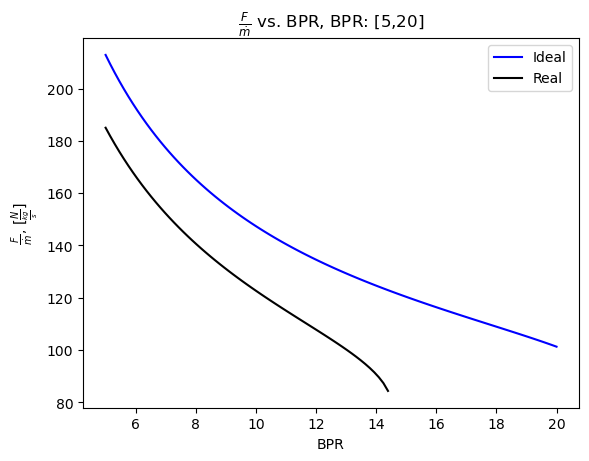

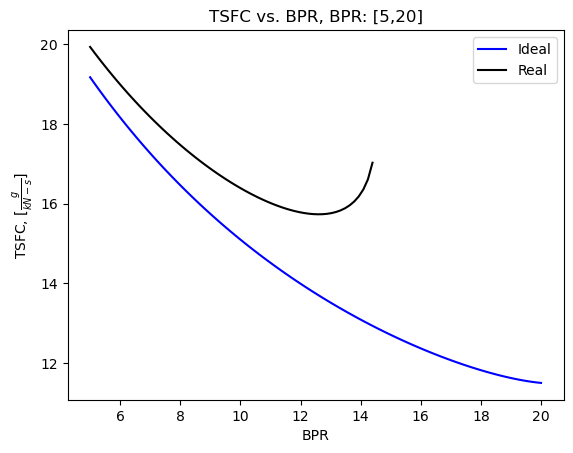

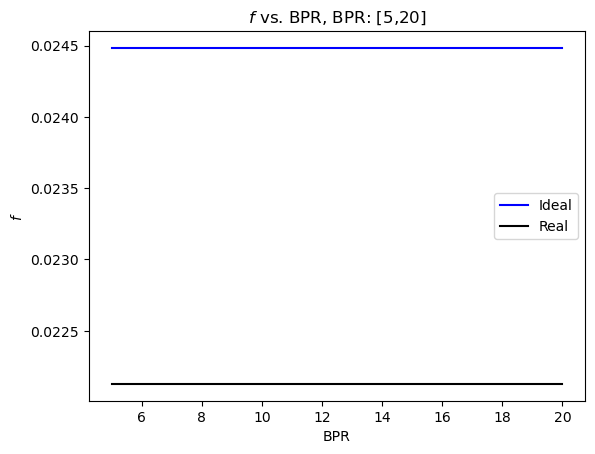

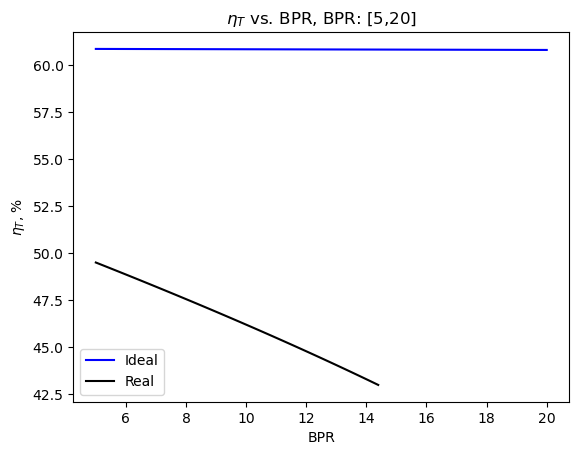

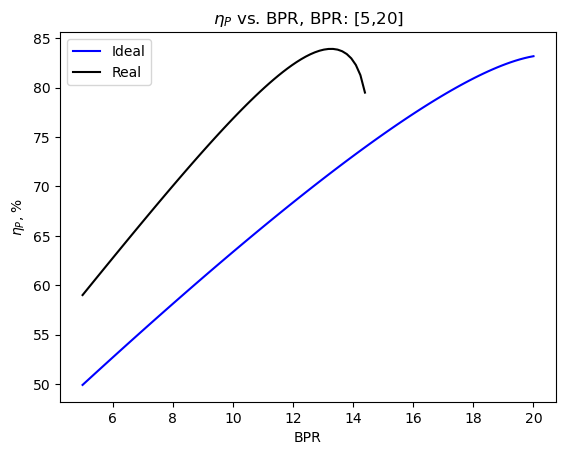

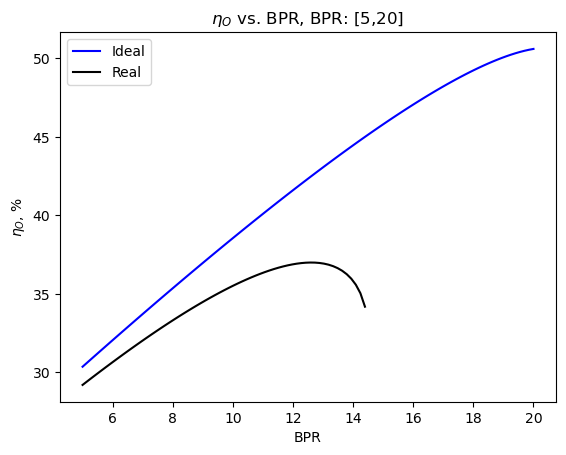

In [3]:
### BPR study ###

# Creates the BPR ranges
BPRsweep = np.linspace(5,20,100)

# Creates the output arrays
FmdotBPR_I = np.zeros(len(BPRsweep))
TSFCBPR_I = np.zeros(len(BPRsweep))
fBPR_I = np.zeros(len(BPRsweep))
nT_BPR_I = np.zeros(len(BPRsweep))
nP_BPR_I = np.zeros(len(BPRsweep))
nO_BPR_I = np.zeros(len(BPRsweep))

FmdotBPR_R = np.zeros(len(BPRsweep))
TSFCBPR_R = np.zeros(len(BPRsweep))
fBPR_R = np.zeros(len(BPRsweep))
nT_BPR_R = np.zeros(len(BPRsweep))
nP_BPR_R = np.zeros(len(BPRsweep))
nO_BPR_R = np.zeros(len(BPRsweep))



# [mdot, dia, (F/mdot), TSFC, f, thermoEff, propEff, overEff]

# Sweeps through to calculate all the values
# Isentropic 
for i in range(len(BPRsweep)):
    data, tau, temp, M = TF.fullCycleCalc(B=BPRsweep[i],pi_f=1.5,pi_c=36,isentropic='T')
    FmdotBPR_I[i] = data[2]
    TSFCBPR_I[i] = data[3]
    fBPR_I[i] = data[4]
    nT_BPR_I[i] = data[5]*100
    nP_BPR_I[i] = data[6]*100
    nO_BPR_I[i] = data[7]*100

# Real
for j in range(len(BPRsweep)):
    data, tau, temp, M = TF.fullCycleCalc(B=BPRsweep[j],pi_f=1.5,pi_c=36,isentropic='F')
    FmdotBPR_R[j] = data[2]
    TSFCBPR_R[j] = data[3]
    fBPR_R[j] = data[4]
    nT_BPR_R[j] = data[5]*100
    nP_BPR_R[j] = data[6]*100
    nO_BPR_R[j] = data[7]*100



# Creates the plots

# F/mdot Plots
plt.plot(BPRsweep, FmdotBPR_I, 'b-',label='Ideal')
plt.plot(BPRsweep, FmdotBPR_R, 'k-',label='Real')
plt.title("$\\frac{F}{\dot{m}}$ vs. BPR, BPR: [5,20]")
plt.xlabel('BPR')
plt.ylabel('$\\frac{F}{\dot{m}}$, $[\\frac{N}{\\frac{kg}{s}}]$')
plt.legend()
plt.show()

# TSFC Plots
plt.plot(BPRsweep, TSFCBPR_I, 'b-',label='Ideal')
plt.plot(BPRsweep, TSFCBPR_R, 'k-',label='Real')
plt.title("TSFC vs. BPR, BPR: [5,20]")
plt.xlabel('BPR')
plt.ylabel('TSFC, $[\\frac{g}{kN-s}]$')
plt.legend()
plt.show()

# f Plots
plt.plot(BPRsweep, fBPR_I, 'b-',label='Ideal')
plt.plot(BPRsweep, fBPR_R, 'k-',label='Real')
plt.title("$f$ vs. BPR, BPR: [5,20]")
plt.xlabel('BPR')
plt.ylabel('$f$')
plt.legend()
plt.show()


# nT Plots
plt.plot(BPRsweep, nT_BPR_I, 'b-',label='Ideal')
plt.plot(BPRsweep, nT_BPR_R, 'k-',label='Real')
plt.title("$\\eta_T$ vs. BPR, BPR: [5,20]")
plt.xlabel('BPR')
plt.ylabel('$\\eta_T$, %')
plt.legend()
plt.show()


# nP Plots
plt.plot(BPRsweep, nP_BPR_I, 'b-',label='Ideal')
plt.plot(BPRsweep, nP_BPR_R, 'k-',label='Real')
plt.title("$\\eta_P$ vs. BPR, BPR: [5,20]")
plt.xlabel('BPR')
plt.ylabel('$\\eta_P$, %')
plt.legend()
plt.show()

# nO Plots
plt.plot(BPRsweep, nO_BPR_I, 'b-',label='Ideal')
plt.plot(BPRsweep, nO_BPR_R, 'k-',label='Real')
plt.title("$\\eta_O$ vs. BPR, BPR: [5,20]")
plt.xlabel('BPR')
plt.ylabel('$\\eta_O$, %')
plt.legend()
plt.show()




### Fan Pressure Ratio (FPR) Design Study 
Analysis of the effect of FPR ranging from 1.2 to 2.0 on the $\frac{F}{\dot{m}}$, TSFC, $f$, $\eta_T$, $\eta_P$, and $\eta_O$ will be demonstrated below

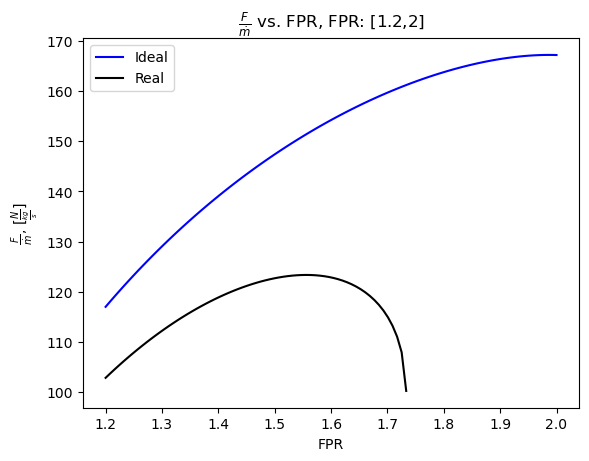

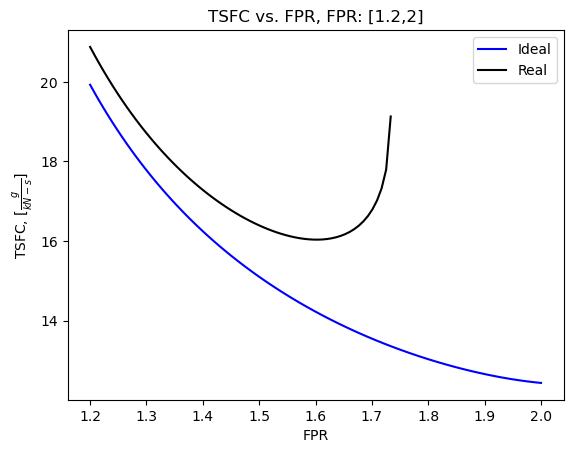

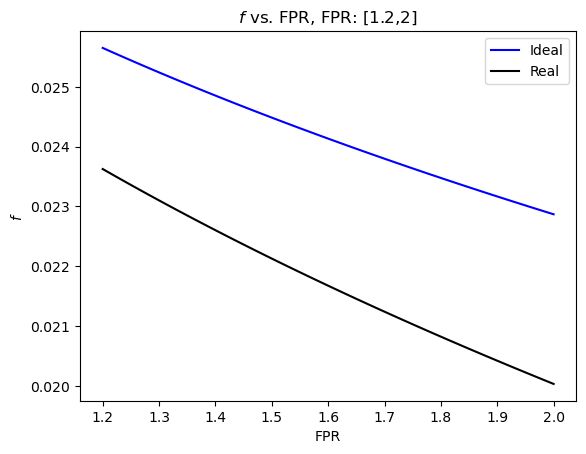

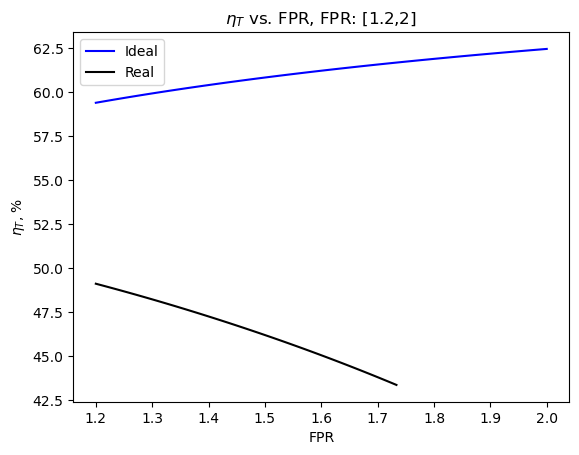

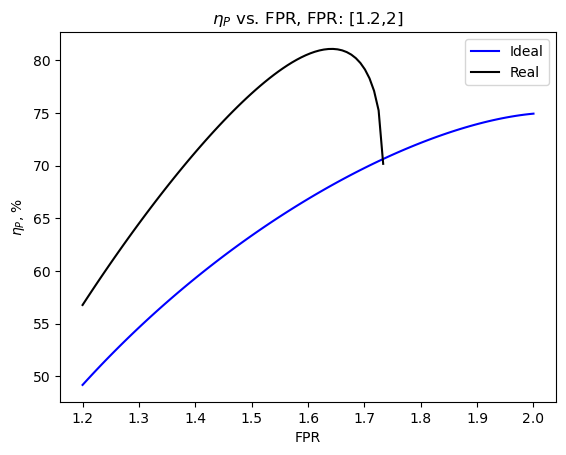

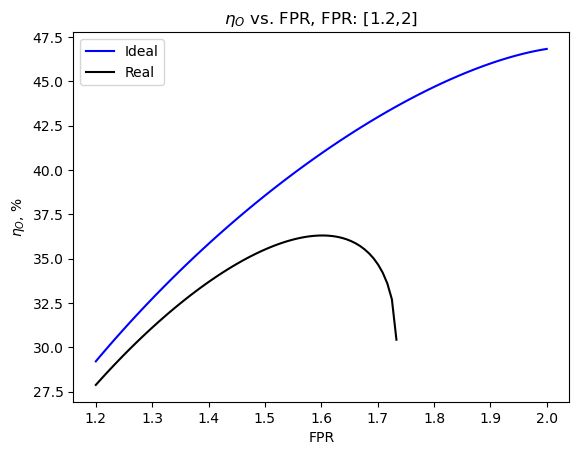

In [4]:
### FPR study ###

# Creates the FPR ranges
FPRsweep = np.linspace(1.2,2,100)

# Creates the output arrays
FmdotFPR_I = np.zeros(len(FPRsweep))
TSFCFPR_I = np.zeros(len(FPRsweep))
fFPR_I = np.zeros(len(FPRsweep))
nT_FPR_I = np.zeros(len(FPRsweep))
nP_FPR_I = np.zeros(len(FPRsweep))
nO_FPR_I = np.zeros(len(FPRsweep))

FmdotFPR_R = np.zeros(len(FPRsweep))
TSFCFPR_R = np.zeros(len(FPRsweep))
fFPR_R = np.zeros(len(FPRsweep))
nT_FPR_R = np.zeros(len(FPRsweep))
nP_FPR_R = np.zeros(len(FPRsweep))
nO_FPR_R = np.zeros(len(FPRsweep))



# [mdot, dia, (F/mdot), TSFC, f, thermoEff, propEff, overEff]

# Sweeps through to calculate all the values
# Isentropic 
for i in range(len(FPRsweep)):
    data, tau, temp, M = TF.fullCycleCalc(B=10,pi_f=FPRsweep[i],pi_c=36,isentropic='T')
    FmdotFPR_I[i] = data[2]
    TSFCFPR_I[i] = data[3]
    fFPR_I[i] = data[4]
    nT_FPR_I[i] = data[5]*100
    nP_FPR_I[i] = data[6]*100
    nO_FPR_I[i] = data[7]*100

# Real
for j in range(len(FPRsweep)):
    data, tau, temp, M = TF.fullCycleCalc(B=10,pi_f=FPRsweep[j],pi_c=36,isentropic='F')
    FmdotFPR_R[j] = data[2]
    TSFCFPR_R[j] = data[3]
    fFPR_R[j] = data[4]
    nT_FPR_R[j] = data[5]*100
    nP_FPR_R[j] = data[6]*100
    nO_FPR_R[j] = data[7]*100



# Creates the plots

# F/mdot Plots
plt.plot(FPRsweep, FmdotFPR_I, 'b-',label='Ideal')
plt.plot(FPRsweep, FmdotFPR_R, 'k-',label='Real')
plt.title("$\\frac{F}{\dot{m}}$ vs. FPR, FPR: [1.2,2]")
plt.xlabel('FPR')
plt.ylabel('$\\frac{F}{\dot{m}}$, $[\\frac{N}{\\frac{kg}{s}}]$')
plt.legend()
plt.show()

# TSFC Plots
plt.plot(FPRsweep, TSFCFPR_I, 'b-',label='Ideal')
plt.plot(FPRsweep, TSFCFPR_R, 'k-',label='Real')
plt.title("TSFC vs. FPR, FPR: [1.2,2]")
plt.xlabel('FPR')
plt.ylabel('TSFC, $[\\frac{g}{kN-s}]$')
plt.legend()
plt.show()

# f Plots
plt.plot(FPRsweep, fFPR_I, 'b-',label='Ideal')
plt.plot(FPRsweep, fFPR_R, 'k-',label='Real')
plt.title("$f$ vs. FPR, FPR: [1.2,2]")
plt.xlabel('FPR')
plt.ylabel('$f$')
plt.legend()
plt.show()


# nT Plots
plt.plot(FPRsweep, nT_FPR_I, 'b-',label='Ideal')
plt.plot(FPRsweep, nT_FPR_R, 'k-',label='Real')
plt.title("$\\eta_T$ vs. FPR, FPR: [1.2,2]")
plt.xlabel('FPR')
plt.ylabel('$\\eta_T$, %')
plt.legend()
plt.show()


# nP Plots
plt.plot(FPRsweep, nP_FPR_I, 'b-',label='Ideal')
plt.plot(FPRsweep, nP_FPR_R, 'k-',label='Real')
plt.title("$\\eta_P$ vs. FPR, FPR: [1.2,2]")
plt.xlabel('FPR')
plt.ylabel('$\\eta_P$, %')
plt.legend()
plt.show()

# nO Plots
plt.plot(FPRsweep, nO_FPR_I, 'b-',label='Ideal')
plt.plot(FPRsweep, nO_FPR_R, 'k-',label='Real')
plt.title("$\\eta_O$ vs. FPR, FPR: [1.2,2]")
plt.xlabel('FPR')
plt.ylabel('$\\eta_O$, %')
plt.legend()
plt.show()

### Compressor Pressure Ratio Design Study
Analysis of the effect of compressor pressure ratio values ranging from 20 to 40 on the $\frac{F}{\dot{m}}$, TSFC, $f$, $\eta_T$, $\eta_P$, and $\eta_O$ will be demonstrated below

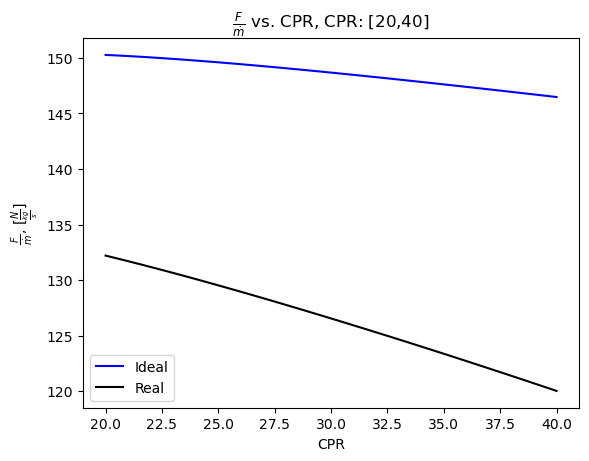

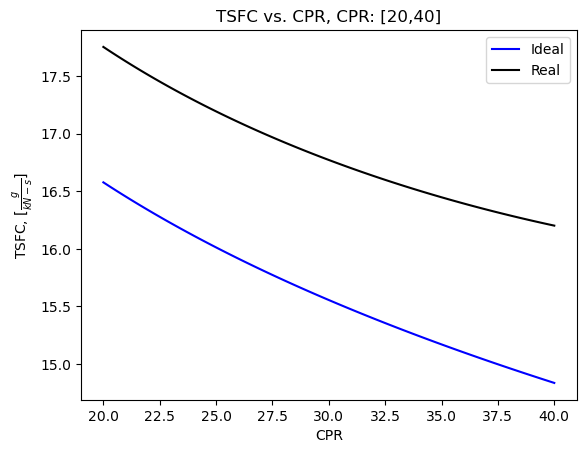

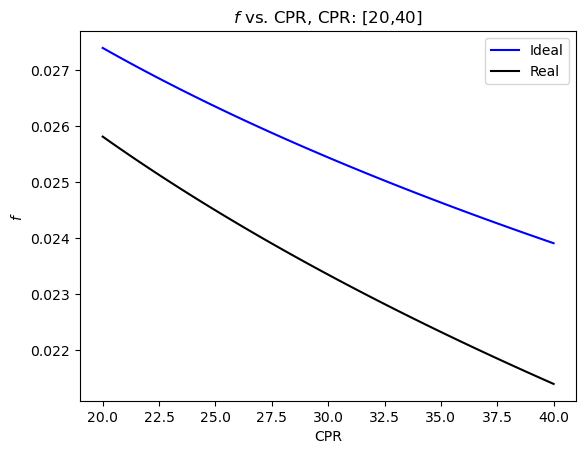

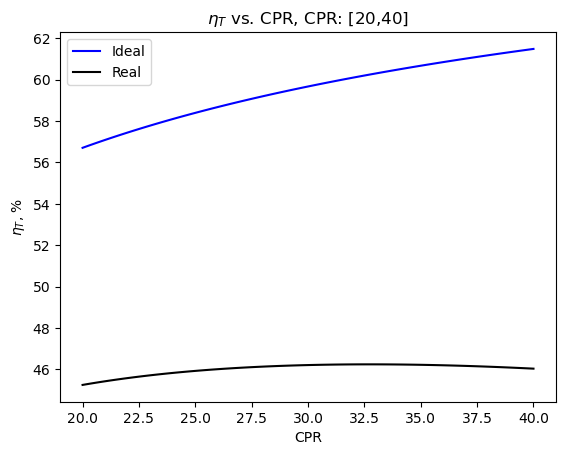

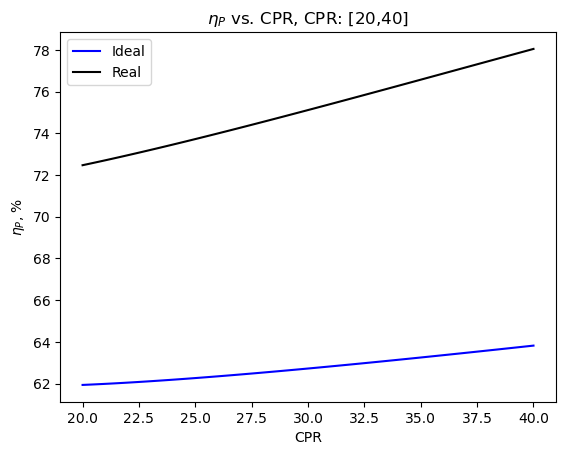

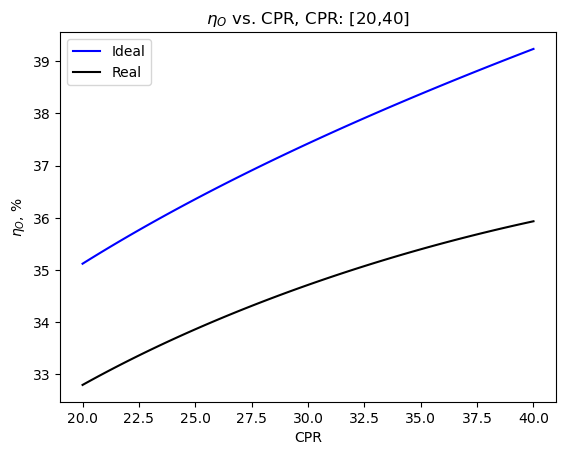

In [5]:
### CPR study ###

# Creates the CPR ranges
CPRsweep = np.linspace(20,40,100)

# Creates the output arrays
FmdotCPR_I = np.zeros(len(CPRsweep))
TSFCCPR_I = np.zeros(len(CPRsweep))
fCPR_I = np.zeros(len(CPRsweep))
nT_CPR_I = np.zeros(len(CPRsweep))
nP_CPR_I = np.zeros(len(CPRsweep))
nO_CPR_I = np.zeros(len(CPRsweep))

FmdotCPR_R = np.zeros(len(CPRsweep))
TSFCCPR_R = np.zeros(len(CPRsweep))
fCPR_R = np.zeros(len(CPRsweep))
nT_CPR_R = np.zeros(len(CPRsweep))
nP_CPR_R = np.zeros(len(CPRsweep))
nO_CPR_R = np.zeros(len(CPRsweep))



# [mdot, dia, (F/mdot), TSFC, f, thermoEff, propEff, overEff]

# Sweeps through to calculate all the values
# Isentropic 
for i in range(len(CPRsweep)):
    data, tau, temp, M = TF.fullCycleCalc(B=10,pi_f=1.5,pi_c=CPRsweep[i],isentropic='T')
    FmdotCPR_I[i] = data[2]
    TSFCCPR_I[i] = data[3]
    fCPR_I[i] = data[4]
    nT_CPR_I[i] = data[5]*100
    nP_CPR_I[i] = data[6]*100
    nO_CPR_I[i] = data[7]*100

# Real
for j in range(len(CPRsweep)):
    data, tau, temp, M = TF.fullCycleCalc(B=10,pi_f=1.5,pi_c=CPRsweep[j],isentropic='F')
    FmdotCPR_R[j] = data[2]
    TSFCCPR_R[j] = data[3]
    fCPR_R[j] = data[4]
    nT_CPR_R[j] = data[5]*100
    nP_CPR_R[j] = data[6]*100
    nO_CPR_R[j] = data[7]*100



# Creates the plots

# F/mdot Plots
plt.plot(CPRsweep, FmdotCPR_I, 'b-',label='Ideal')
plt.plot(CPRsweep, FmdotCPR_R, 'k-',label='Real')
plt.title("$\\frac{F}{\dot{m}}$ vs. CPR, CPR: [20,40]")
plt.xlabel('CPR')
plt.ylabel('$\\frac{F}{\dot{m}}$, $[\\frac{N}{\\frac{kg}{s}}]$')
plt.legend()
plt.show()

# TSFC Plots
plt.plot(CPRsweep, TSFCCPR_I, 'b-',label='Ideal')
plt.plot(CPRsweep, TSFCCPR_R, 'k-',label='Real')
plt.title("TSFC vs. CPR, CPR: [20,40]")
plt.xlabel('CPR')
plt.ylabel('TSFC, $[\\frac{g}{kN-s}]$')
plt.legend()
plt.show()

# f Plots
plt.plot(CPRsweep, fCPR_I, 'b-',label='Ideal')
plt.plot(CPRsweep, fCPR_R, 'k-',label='Real')
plt.title("$f$ vs. CPR, CPR: [20,40]")
plt.xlabel('CPR')
plt.ylabel('$f$')
plt.legend()
plt.show()


# nT Plots
plt.plot(CPRsweep, nT_CPR_I, 'b-',label='Ideal')
plt.plot(CPRsweep, nT_CPR_R, 'k-',label='Real')
plt.title("$\\eta_T$ vs. CPR, CPR: [20,40]")
plt.xlabel('CPR')
plt.ylabel('$\\eta_T$, %')
plt.legend()
plt.show()


# nP Plots
plt.plot(CPRsweep, nP_CPR_I, 'b-',label='Ideal')
plt.plot(CPRsweep, nP_CPR_R, 'k-',label='Real')
plt.title("$\\eta_P$ vs. CPR, CPR: [20,40]")
plt.xlabel('CPR')
plt.ylabel('$\\eta_P$, %')
plt.legend()
plt.show()

# nO Plots
plt.plot(CPRsweep, nO_CPR_I, 'b-',label='Ideal')
plt.plot(CPRsweep, nO_CPR_R, 'k-',label='Real')
plt.title("$\\eta_O$ vs. CPR, CPR: [20,40]")
plt.xlabel('CPR')
plt.ylabel('$\\eta_O$, %')
plt.legend()
plt.show()


### Combining Parameters
Now, varying multiple variables can create a mesh to find the optimal parameters

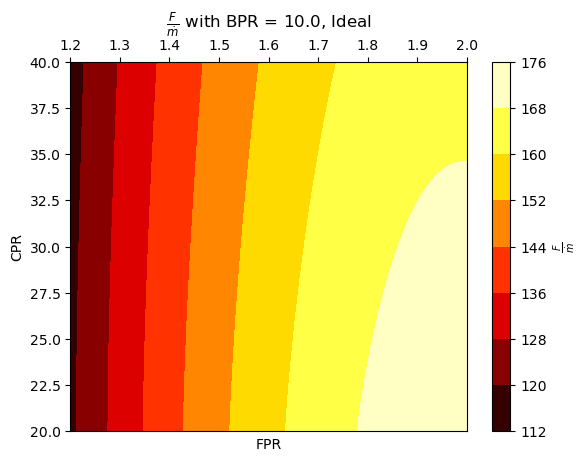

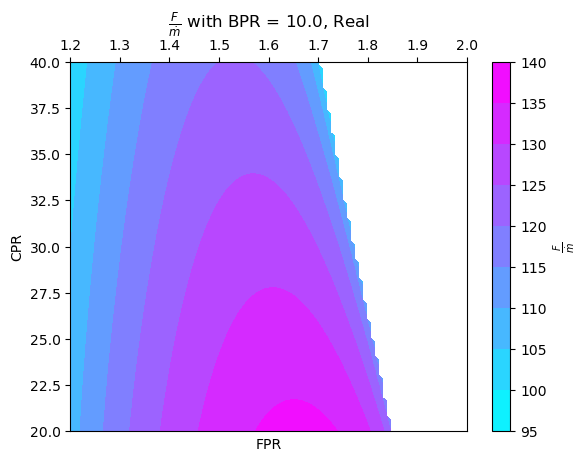

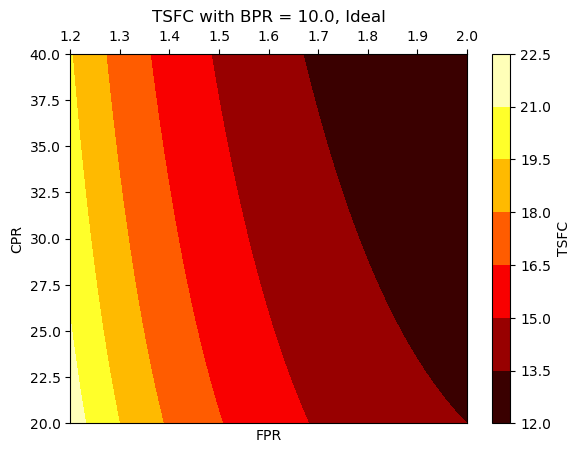

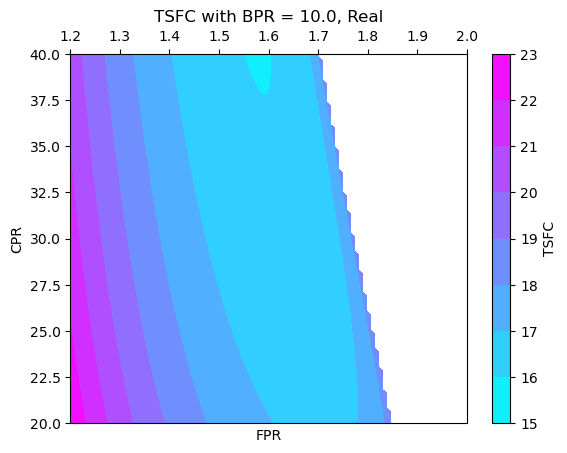

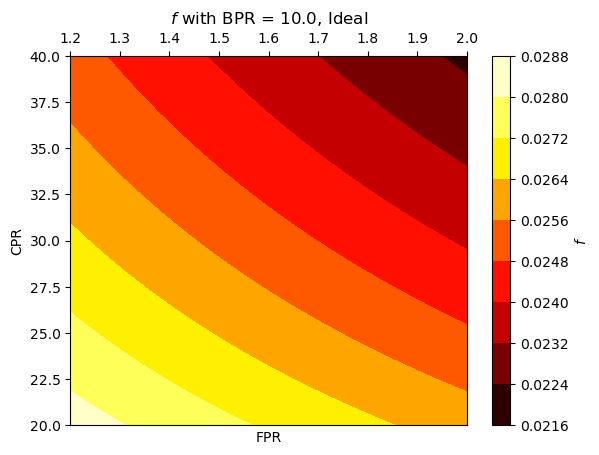

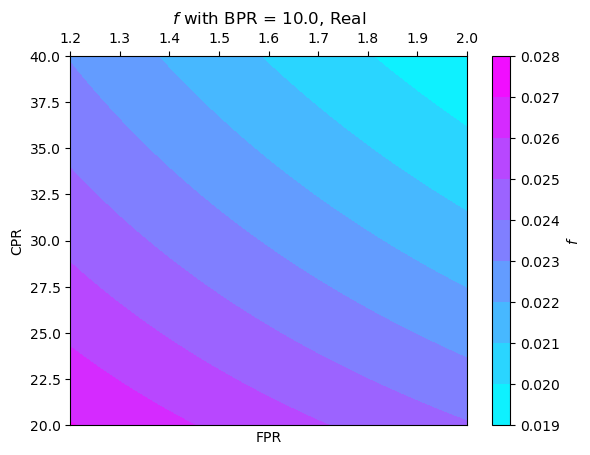

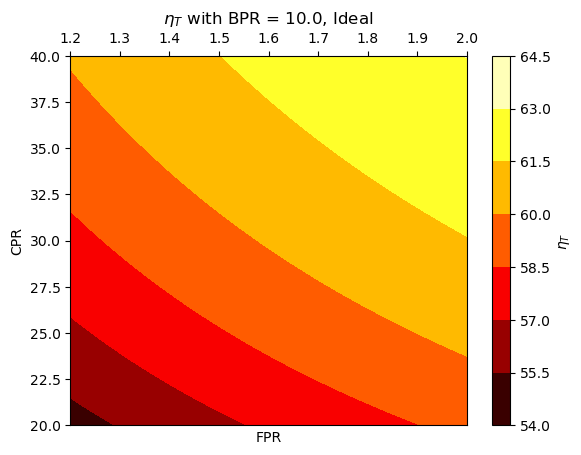

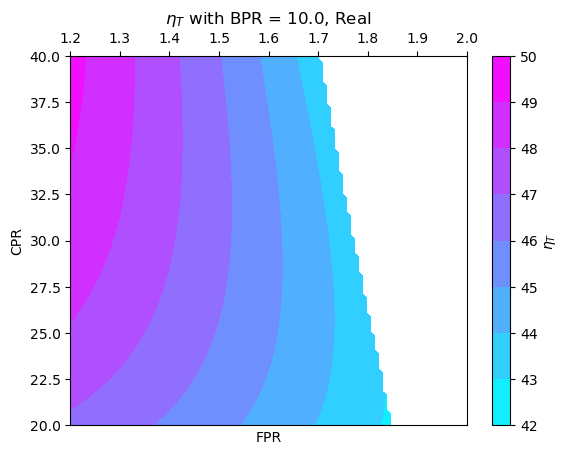

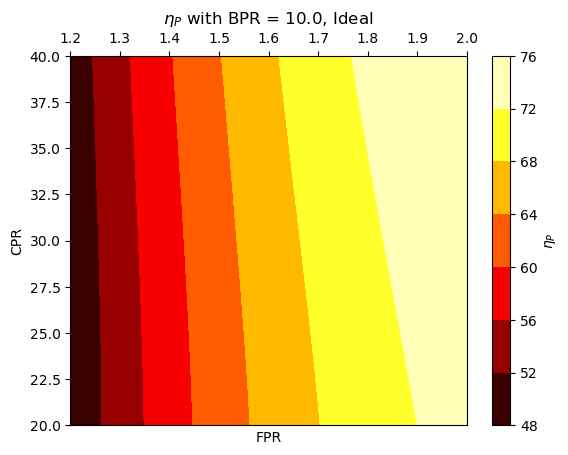

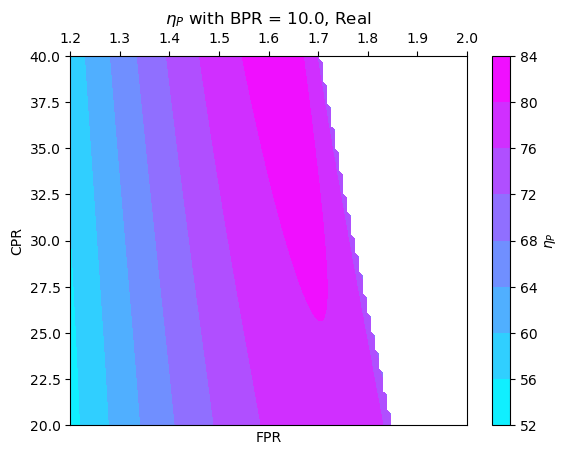

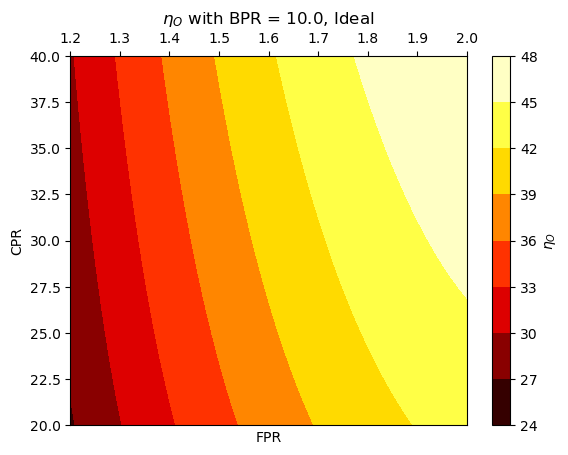

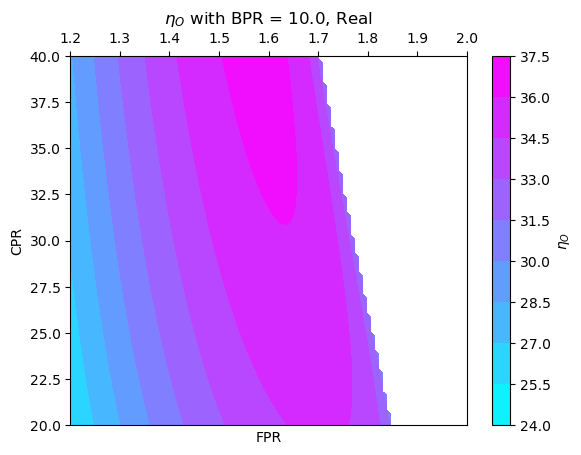

In [6]:

### BPR Combined Study ###

# Holding BPR = 10

FPRsweep = np.linspace(1.2,2.0,100)
CPRsweep = np.linspace(20,40,100)


# Creates the output arrays
FmdotBPRConst_I = np.zeros((100,100))
TSFCBPRConst_I = np.zeros((100,100))
fBPRConst_I = np.zeros((100,100))
nT_BPRConst_I = np.zeros((100,100))
nP_BPRConst_I = np.zeros((100,100))
nO_BPRConst_I = np.zeros((100,100))

FmdotBPRConst_R = np.zeros((100,100))
TSFCBPRConst_R = np.zeros((100,100))
fBPRConst_R = np.zeros((100,100))
nT_BPRConst_R = np.zeros((100,100))
nP_BPRConst_R = np.zeros((100,100))
nO_BPRConst_R = np.zeros((100,100))



# [mdot, dia, (F/mdot), TSFC, f, thermoEff, propEff, overEff]

# Sweeps through to calculate all the values
# Isentropic
row = 0
col = 0
for i in range(len(CPRsweep)):
    for j in range(len(FPRsweep)):
        data, tau, temp, M = TF.fullCycleCalc(B=10,pi_f=FPRsweep[j],pi_c=CPRsweep[i],isentropic='T')
        FmdotBPRConst_I[i][j] = data[2]
        TSFCBPRConst_I[i][j] = data[3]
        fBPRConst_I[i][j] = data[4]
        nT_BPRConst_I[i][j]= data[5]*100
        nP_BPRConst_I[i][j] = data[6]*100
        nO_BPRConst_I[i][j] = data[7]*100
        col += 1
    row += 1

# Real
row = 0 
col = 0
for i in range(len(CPRsweep)):
    for j in range(len(FPRsweep)):
        data, tau, temp, M = TF.fullCycleCalc(B=10,pi_f=FPRsweep[j],pi_c=CPRsweep[i],isentropic='F')
        FmdotBPRConst_R[i][j] = data[2]
        TSFCBPRConst_R[i][j] = data[3]
        fBPRConst_R[i][j] = data[4]
        nT_BPRConst_R[i][j] = data[5]*100
        nP_BPRConst_R[i][j] = data[6]*100
        nO_BPRConst_R[i][j] = data[7]*100
        col += 1
    row+= 1


# Creates the plots

##### F/mdot #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,FmdotBPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\frac{F}{\dot{m}}$")
ax1.set_title('$\\frac{F}{\dot{m}}$ with BPR = 10.0, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,FmdotBPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\frac{F}{\dot{m}}$")
ax1.set_title('$\\frac{F}{\dot{m}}$ with BPR = 10.0, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()






###### TSFC ######
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,TSFCBPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("TSFC")
ax1.set_title('TSFC with BPR = 10.0, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,TSFCBPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("TSFC")
ax1.set_title('TSFC with BPR = 10.0, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()





##### f  #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,fBPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$f$")
ax1.set_title('$f$ with BPR = 10.0, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,fBPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$f$")
ax1.set_title('$f$ with BPR = 10.0, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()





##### nT #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,nT_BPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_T$")
ax1.set_title('$\\eta_T$ with BPR = 10.0, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,nT_BPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_T$")
ax1.set_title('$\\eta_T$ with BPR = 10.0, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()





##### nP #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,nP_BPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_P$")
ax1.set_title('$\\eta_P$ with BPR = 10.0, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,nP_BPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_P$")
ax1.set_title('$\\eta_P$ with BPR = 10.0, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()





##### nO #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,nO_BPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_O$")
ax1.set_title('$\\eta_O$ with BPR = 10.0, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,CPRsweep,nO_BPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_O$")
ax1.set_title('$\\eta_O$ with BPR = 10.0, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()



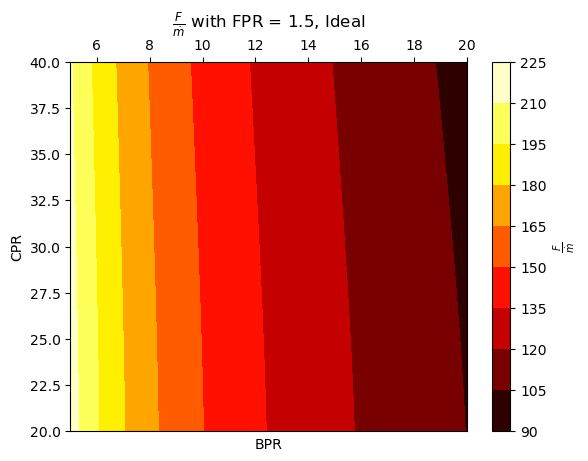

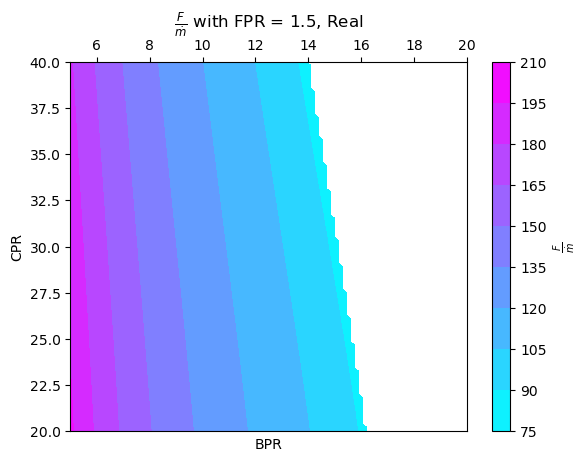

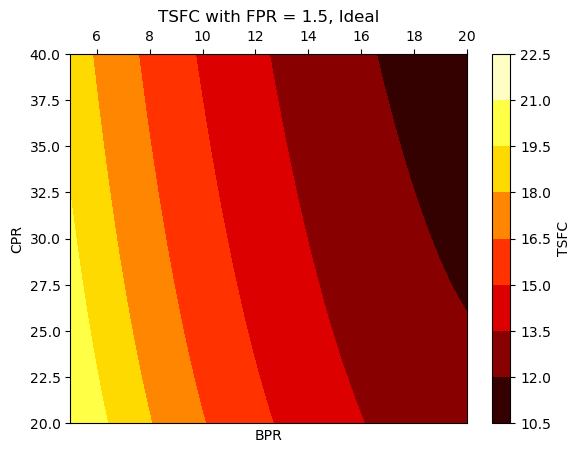

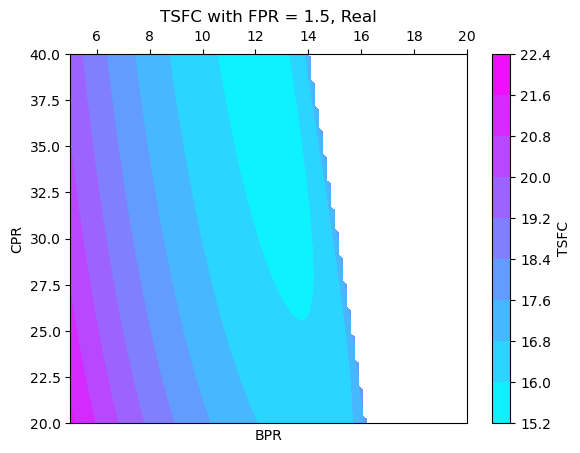

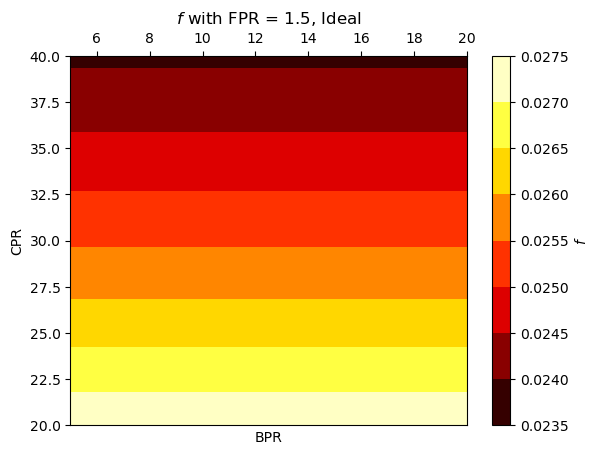

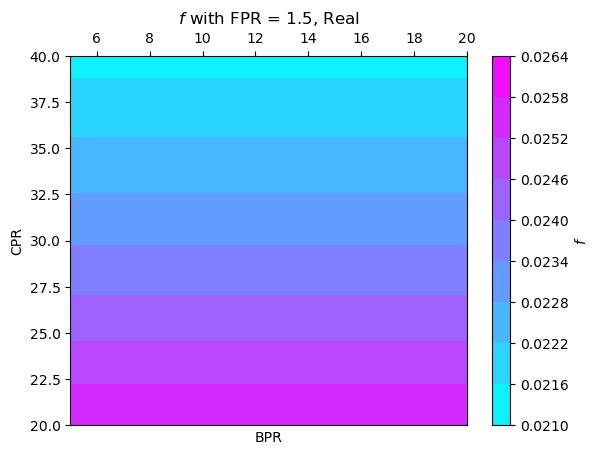

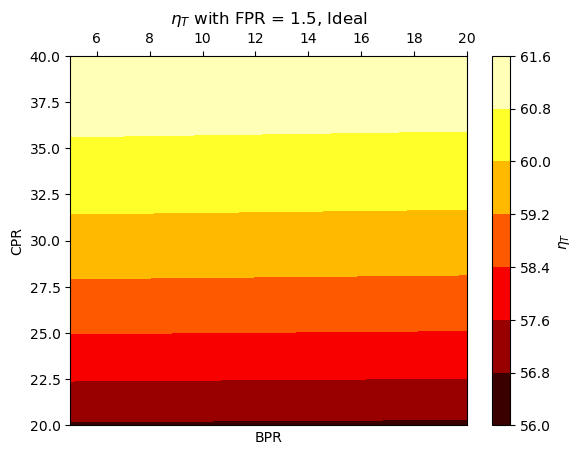

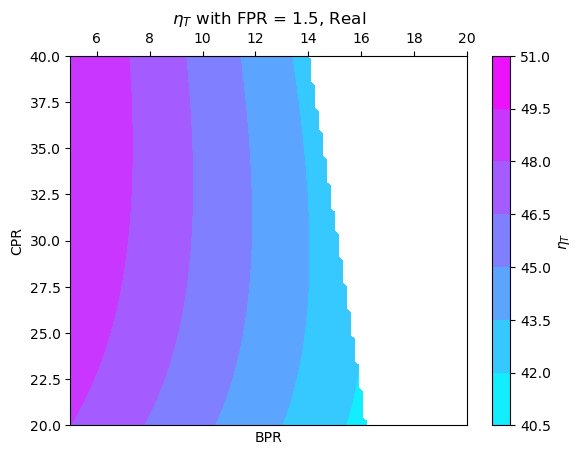

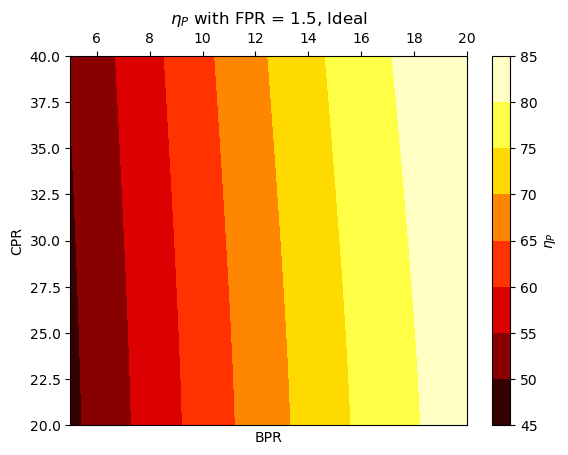

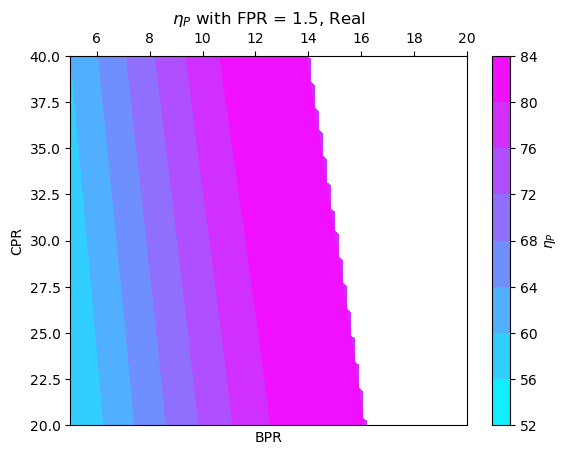

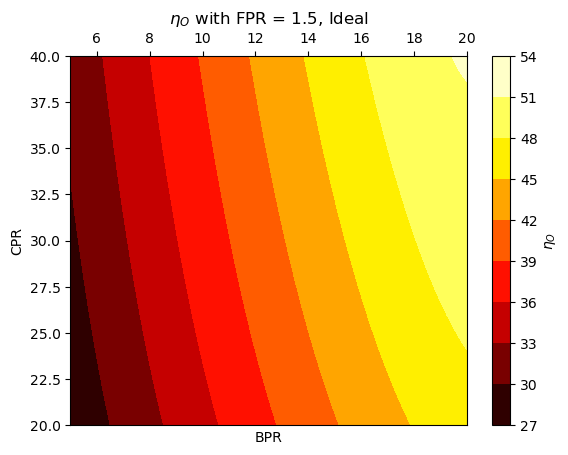

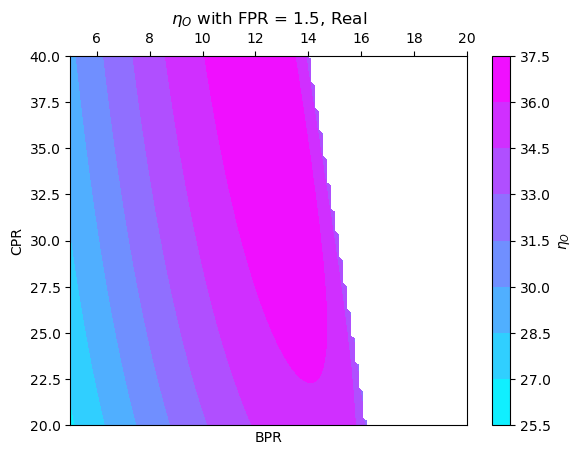

In [7]:
### FPR Combined Study ###

# Holding FPR = 1.5

BPRsweep = np.linspace(5,20,100)
CPRsweep = np.linspace(20,40,100)


# Creates the output arrays
FmdotFPRConst_I = np.zeros((100,100))
TSFCFPRConst_I = np.zeros((100,100))
fFPRConst_I = np.zeros((100,100))
nT_FPRConst_I = np.zeros((100,100))
nP_FPRConst_I = np.zeros((100,100))
nO_FPRConst_I = np.zeros((100,100))

FmdotFPRConst_R = np.zeros((100,100))
TSFCFPRConst_R = np.zeros((100,100))
fFPRConst_R = np.zeros((100,100))
nT_FPRConst_R = np.zeros((100,100))
nP_FPRConst_R = np.zeros((100,100))
nO_FPRConst_R = np.zeros((100,100))



# [mdot, dia, (F/mdot), TSFC, f, thermoEff, propEff, overEff]

# Sweeps through to calculate all the values
# Isentropic
row = 0
col = 0
for i in range(len(CPRsweep)):
    for j in range(len(BPRsweep)):
        data, tau, temp, M = TF.fullCycleCalc(B=BPRsweep[j],pi_f=1.5,pi_c=CPRsweep[i],isentropic='T')
        FmdotFPRConst_I[i][j] = data[2]
        TSFCFPRConst_I[i][j] = data[3]
        fFPRConst_I[i][j] = data[4]
        nT_FPRConst_I[i][j]= data[5]*100
        nP_FPRConst_I[i][j] = data[6]*100
        nO_FPRConst_I[i][j] = data[7]*100
        col += 1
    row += 1

# Real
row = 0 
col = 0
for i in range(len(CPRsweep)):
    for j in range(len(BPRsweep)):
        data, tau, temp, M = TF.fullCycleCalc(B=BPRsweep[j],pi_f=1.5,pi_c=CPRsweep[i],isentropic='F')
        FmdotFPRConst_R[i][j] = data[2]
        TSFCFPRConst_R[i][j] = data[3]
        fFPRConst_R[i][j] = data[4]
        nT_FPRConst_R[i][j] = data[5]*100
        nP_FPRConst_R[i][j] = data[6]*100
        nO_FPRConst_R[i][j] = data[7]*100
        col += 1
    row+= 1


# Creates the plots

##### F/mdot #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,FmdotFPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\frac{F}{\dot{m}}$")
ax1.set_title('$\\frac{F}{\dot{m}}$ with FPR = 1.5, Ideal')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,FmdotFPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\frac{F}{\dot{m}}$")
ax1.set_title('$\\frac{F}{\dot{m}}$ with FPR = 1.5, Real')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()






###### TSFC ######
fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,TSFCFPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("TSFC")
ax1.set_title('TSFC with FPR = 1.5, Ideal')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,TSFCFPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("TSFC")
ax1.set_title('TSFC with FPR = 1.5, Real')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()





##### f  #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,fFPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$f$")
ax1.set_title('$f$ with FPR = 1.5, Ideal')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,fFPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$f$")
ax1.set_title('$f$ with FPR = 1.5, Real')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()




##### nT #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,nT_FPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_T$")
ax1.set_title('$\\eta_T$ with FPR = 1.5, Ideal')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,nT_FPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_T$")
ax1.set_title('$\\eta_T$ with FPR = 1.5, Real')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()





##### nP #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,nP_FPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_P$")
ax1.set_title('$\\eta_P$ with FPR = 1.5, Ideal')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,nP_FPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_P}$")
ax1.set_title('$\\eta_P$ with FPR = 1.5, Real')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()




##### nO #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,nO_FPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_O$")
ax1.set_title('$\\eta_O$ with FPR = 1.5, Ideal')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(BPRsweep,CPRsweep,nO_FPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_O$")
ax1.set_title('$\\eta_O$ with FPR = 1.5, Real')
ax1.set_xlabel('BPR')
ax1.set_ylabel('CPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()


c:\Users\Delli\Documents\GitHub\AirbreathingProject1\Project1BackendCalcs.py:182: RuntimeWarning: invalid value encountered in scalar power
  self.P_05 = self.P_04_5/(self.T_04_5/self.T_05)**(y/(nt*(y-1)))


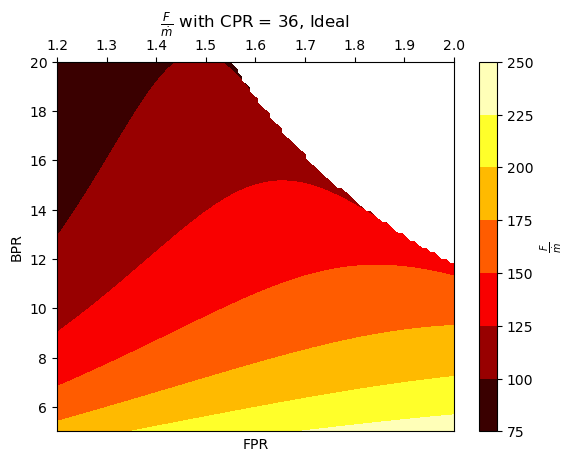

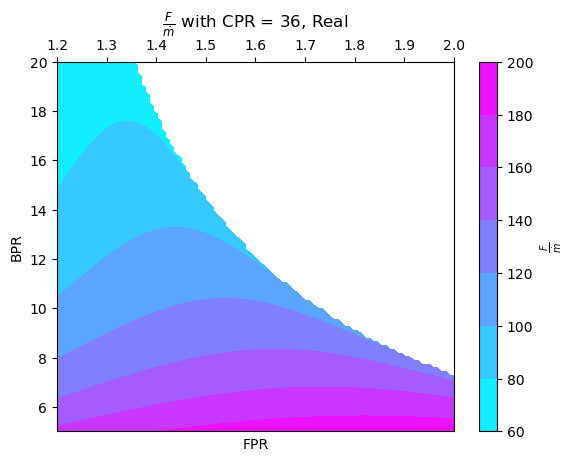

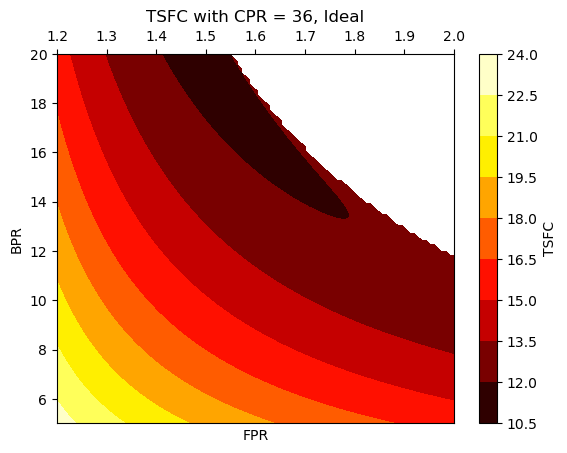

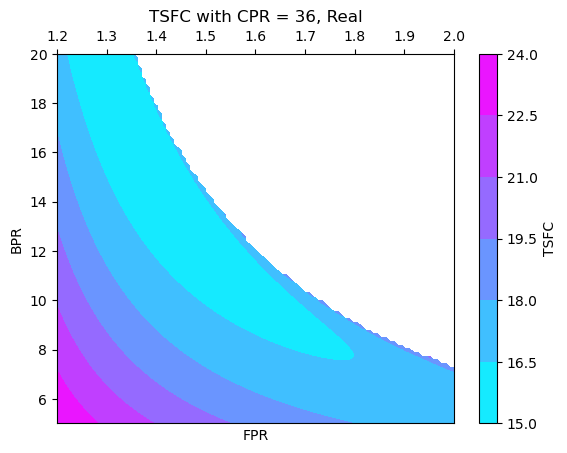

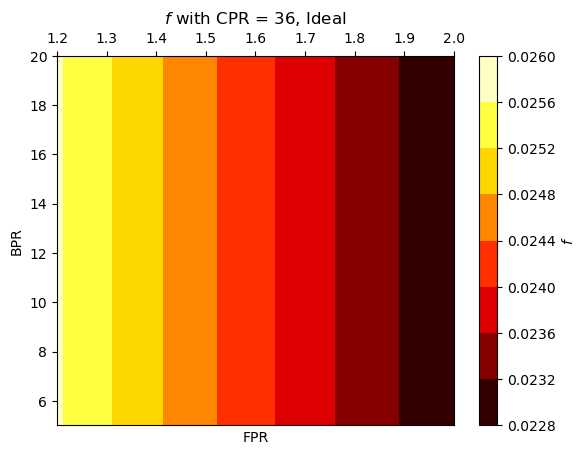

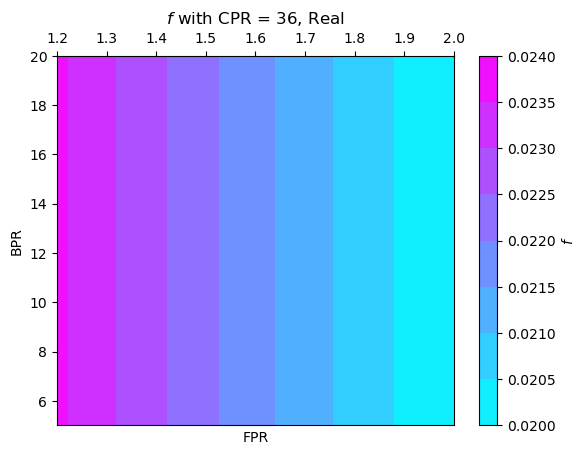

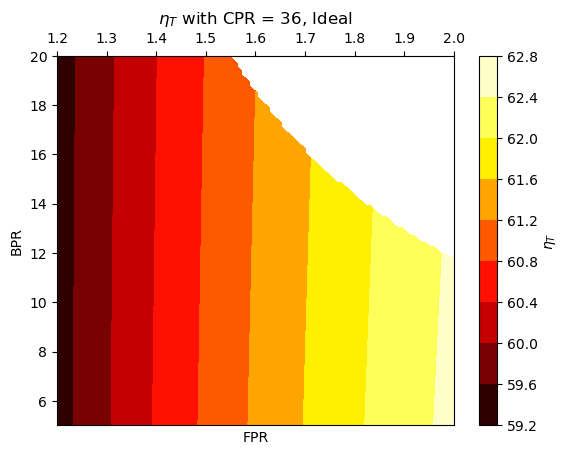

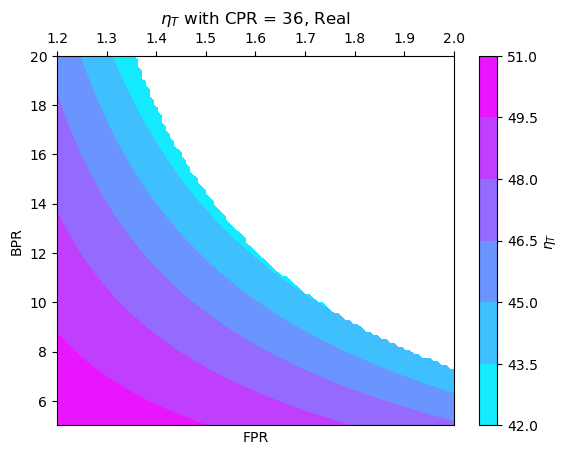

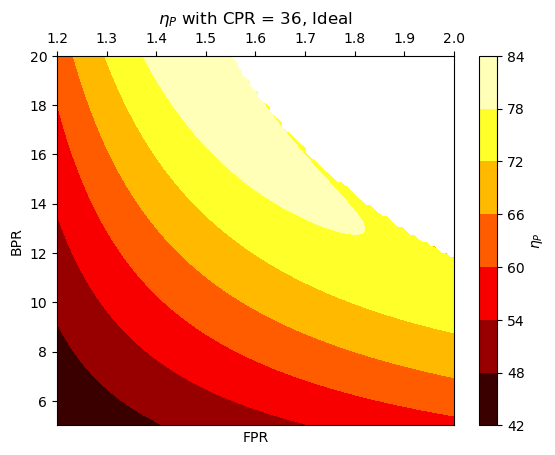

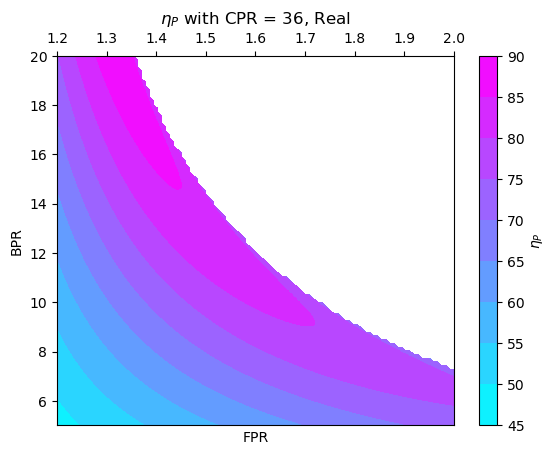

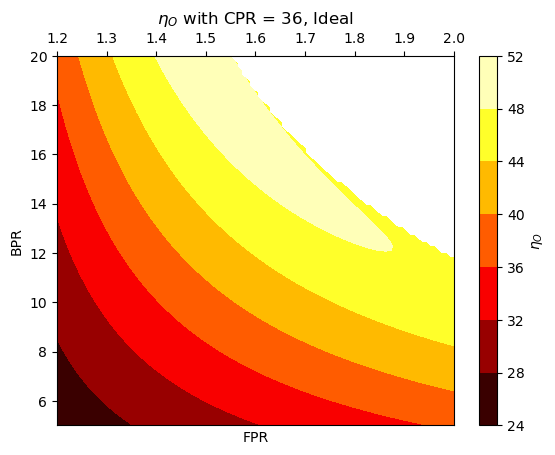

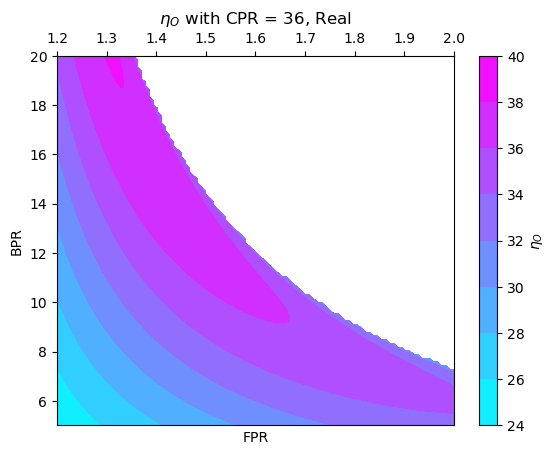

In [8]:
### CPR Combined Study ###

# Holding CPR = 36

BPRsweep = np.linspace(5,20,100)
FPRsweep = np.linspace(1.2,2,100)


# Creates the output arrays
FmdotCPRConst_I = np.zeros((100,100))
TSFCCPRConst_I = np.zeros((100,100))
fCPRConst_I = np.zeros((100,100))
nT_CPRConst_I = np.zeros((100,100))
nP_CPRConst_I = np.zeros((100,100))
nO_CPRConst_I = np.zeros((100,100))

FmdotCPRConst_R = np.zeros((100,100))
TSFCCPRConst_R = np.zeros((100,100))
fCPRConst_R = np.zeros((100,100))
nT_CPRConst_R = np.zeros((100,100))
nP_CPRConst_R = np.zeros((100,100))
nO_CPRConst_R = np.zeros((100,100))



# [mdot, dia, (F/mdot), TSFC, f, thermoEff, propEff, overEff]

# Sweeps through to calculate all the values
# Isentropic
row = 0
col = 0
for i in range(len(BPRsweep)):
    for j in range(len(FPRsweep)):
        data, tau, temp, M = TF.fullCycleCalc(B=BPRsweep[i],pi_f=FPRsweep[j],pi_c=36,isentropic='T')
        FmdotCPRConst_I[i][j] = data[2]
        TSFCCPRConst_I[i][j] = data[3]
        fCPRConst_I[i][j] = data[4]
        nT_CPRConst_I[i][j]= data[5]*100
        nP_CPRConst_I[i][j] = data[6]*100
        nO_CPRConst_I[i][j] = data[7]*100
        col += 1
    row += 1

# Real
row = 0 
col = 0
for i in range(len(BPRsweep)):
    for j in range(len(FPRsweep)):
        data, tau, temp, M = TF.fullCycleCalc(B=BPRsweep[i],pi_f=FPRsweep[j],pi_c=36,isentropic='F')
        FmdotCPRConst_R[i][j] = data[2]
        TSFCCPRConst_R[i][j] = data[3]
        fCPRConst_R[i][j] = data[4]
        nT_CPRConst_R[i][j] = data[5]*100
        nP_CPRConst_R[i][j] = data[6]*100
        nO_CPRConst_R[i][j] = data[7]*100
        col += 1
    row+= 1


# Creates the plots

##### F/mdot #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,FmdotCPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\frac{F}{\dot{m}}$")
ax1.set_title('$\\frac{F}{\dot{m}}$ with CPR = 36, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,FmdotCPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\frac{F}{\dot{m}}$")
ax1.set_title('$\\frac{F}{\dot{m}}$ with CPR = 36, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()






###### TSFC ######
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,TSFCCPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("TSFC")
ax1.set_title('TSFC with CPR = 36, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,TSFCCPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("TSFC")
ax1.set_title('TSFC with CPR = 36, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()






##### f  #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,fCPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$f$")
ax1.set_title('$f$ with CPR = 36, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,fCPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$f$")
ax1.set_title('$f$ with CPR = 36, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()





##### nT #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,nT_CPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_T$")
ax1.set_title('$\\eta_T$ with CPR = 36, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,nT_CPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_T$")
ax1.set_title('$\\eta_T$ with CPR = 36, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()






##### nP #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,nP_CPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_P$")
ax1.set_title('$\\eta_P$ with CPR = 36, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,nP_CPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_P$")
ax1.set_title('$\\eta_P$ with CPR = 36, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()




##### nO #####
fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,nO_CPRConst_I,cmap='hot')
cbar = plt.colorbar()
cbar.set_label("$\\eta_O$")
ax1.set_title('$\\eta_O$ with CPR = 36, Ideal')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()

fig1, ax1 = plt.subplots(1,1)
plt.contourf(FPRsweep,BPRsweep,nO_CPRConst_R,cmap='cool')
cbar = plt.colorbar()
cbar.set_label("$\\eta_O$")
ax1.set_title('$\\eta_O$ with CPR = 36, Real')
ax1.set_xlabel('FPR')
ax1.set_ylabel('BPR')
ax1.xaxis.tick_top()
# plt.gca().invert_yaxis()



### Our Perspective on Design Performance 
This is where we will review the graphs and suggest avenues of design.